In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Downloads/MBS.csv')
print(df)

      Student ID  Undergrad Degree  Undergrad Grade  MBA Grade  \
0              1          Business             68.4       90.2   
1              2          Business             62.1       92.8   
2              3  Computer Science             70.2       68.7   
3              4       Engineering             75.1       80.7   
4              5           Finance             60.9       74.9   
...          ...               ...              ...        ...   
1195        1196          Business             32.5       30.9   
1196        1197  Computer Science             32.8       31.2   
1197        1198       Engineering             33.1       31.4   
1198        1199           Finance             33.4       31.7   
1199        1200               Art              NaN        0.0   

     Work Experience  Employability (Before)  Employability (After)  \
0                 No                   252.0                  276.0   
1                 No                   423.0                  410

In [4]:
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,NaN
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,NaN
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,NaN


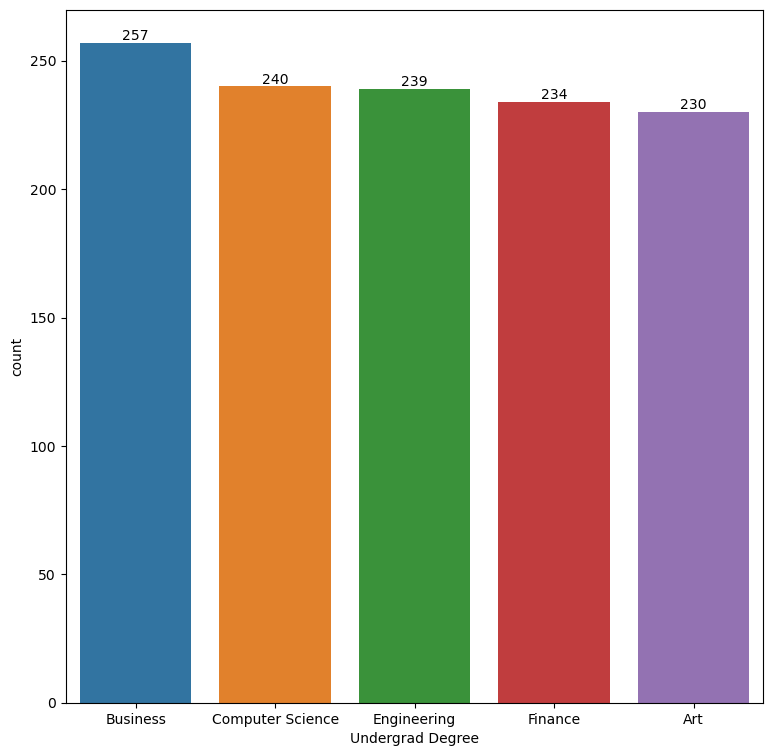

In [10]:
plt.figure(figsize=(9,9))
ax=sbn.countplot(data=df,x="Undergrad Degree")
ax.bar_label(ax.containers[0])
plt.show()

In [11]:
print(df.duplicated())

0       False
1       False
2       False
3       False
4       False
        ...  
1195    False
1196    False
1197    False
1198    False
1199    False
Length: 1200, dtype: bool


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1164 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   object 
 5   Employability (Before)  1193 non-null   float64
 6   Employability (After)   1195 non-null   float64
 7   Status                  0 non-null      float64
 8   Annual Salary           716 non-null    float64
 9   Placement Status        0 non-null      float64
dtypes: float64(7), int64(1), object(2)
memory usage: 93.9+ KB
None


In [58]:
df['Annual Salary'].fillna(0,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              1200 non-null   int64  
 1   Undergrad Degree        1200 non-null   object 
 2   Undergrad Grade         1164 non-null   float64
 3   MBA Grade               1200 non-null   float64
 4   Work Experience         1200 non-null   object 
 5   Employability (Before)  1193 non-null   float64
 6   Employability (After)   1195 non-null   float64
 7   Status                  1200 non-null   object 
 8   Annual Salary           1200 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 84.5+ KB


In [14]:
df.head()

,Student ID,Undergrad Degree,Undergrad Grade,MBA Grade,Work Experience,Employability (Before),Employability (After),Status,Annual Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,0.0
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,0.0
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,0.0


In [7]:
p=df[df['Status']=='Placed']
np=df[df['Status']=='Not Placed']
print(p)

      Student ID  Undergrad Degree  Undergrad Grade  MBA Grade  \
0              1          Business             68.4       90.2   
2              3  Computer Science             70.2       68.7   
6              7           Finance             76.4       83.3   
7              8          Business             82.6       88.7   
8              9           Finance             76.9       75.4   
...          ...               ...              ...        ...   
1191        1192  Computer Science             31.3       29.7   
1193        1194           Finance             31.9       30.3   
1195        1196          Business             32.5       30.9   
1196        1197  Computer Science             32.8       31.2   
1198        1199           Finance             33.4       31.7   

     Work Experience  Employability (Before)  Employability (After)  Status  \
0                 No                   252.0                  276.0  Placed   
2                Yes                   101.0     

In [20]:
bp=p.groupby("Undergrad Degree").agg({'Status':"count"})
print(bp)

                  Status
Undergrad Degree        
Art                    6
Business             240
Computer Science     231
Engineering            9
Finance              230


[Text(0, 0, '6'),
 Text(0, 0, '240'),
 Text(0, 0, '231'),
 Text(0, 0, '9'),
 Text(0, 0, '230')]

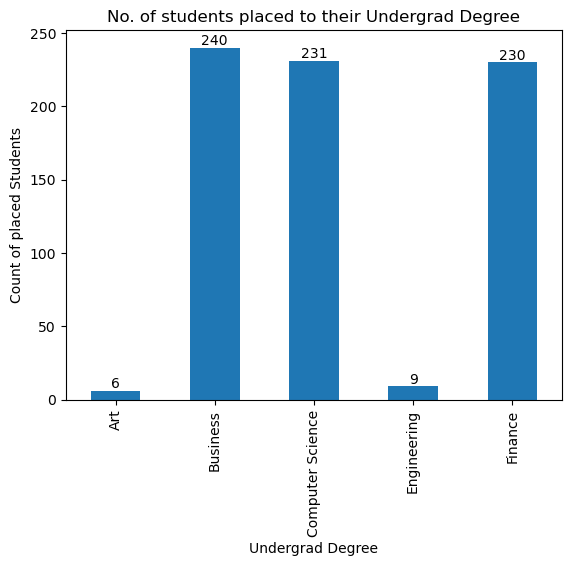

In [28]:
ax=bp.plot(kind='bar',legend=False)
plt.title("No. of students placed to their Undergrad Degree")
plt.xlabel("Undergrad Degree")
plt.ylabel("Count of placed Students")
ax.bar_label(ax.containers[0])

In [19]:
uma=df.groupby("Undergrad Degree").agg({"Undergrad Grade":"mean","MBA Grade":"mean","Annual Salary":"mean"})
print(uma)

                  Undergrad Grade  MBA Grade  Annual Salary
Undergrad Degree                                           
Art                     55.986216  51.654348  101916.666667
Business                57.777500  54.170817  125572.013889
Computer Science        56.278298  53.042500  125158.629149
Engineering             56.605150  53.166946  125055.555556
Finance                 56.038053  51.957692  125733.217391


In [8]:
bp=np.groupby("Undergrad Degree").agg({'Status':"count"})
print(bp)

                  Status
Undergrad Degree        
Art                  224
Business              17
Computer Science       9
Engineering          230
Finance                4


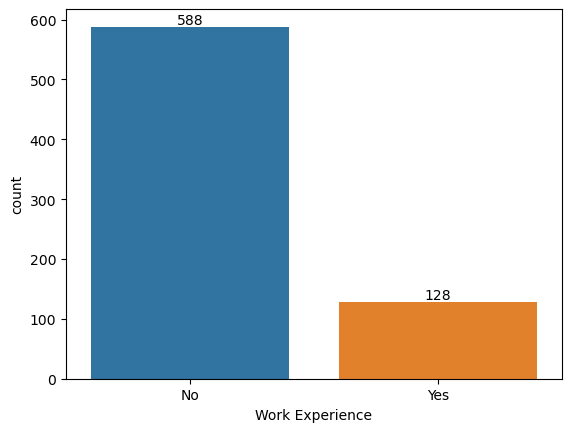

In [41]:
ax=sbn.countplot(x='Work Experience',data=p)
ax.bar_label(ax.containers[0])
plt.show()

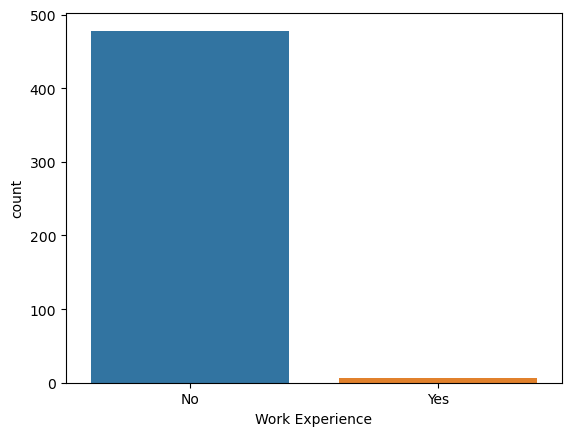

In [10]:
ax=sbn.countplot(data=np,x='Work Experience')
plt.show()

In [62]:
#plt.figure(figsize=(30,30))
avgSalaryDept=df.groupby("Undergrad Degree").agg({'Annual Salary':'mean'})
print(avgSalaryDept)

                  Annual Salary
Undergrad Degree               
Art                 2658.695652
Business          117265.693904
Computer Science  120465.180556
Engineering         4709.205021
Finance           123583.931624


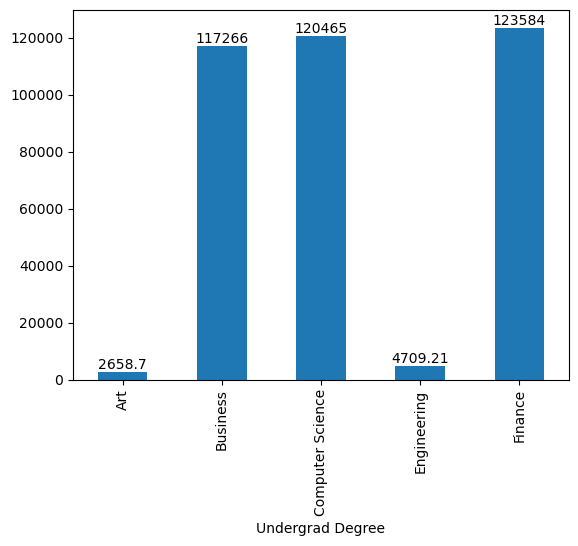

In [70]:
ax=avgSalaryDept.plot(kind='bar',legend=False)
ax.bar_label(ax.containers[0])
plt.show()

In [72]:
df.agg({"Employability (Before)":'mean',"Employability (After)":'mean'})

Employability (Before)    216.306790
Employability (After)     288.082998
dtype: float64

C:\Users\Srushti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='MBA Grade', ylabel='Density'>

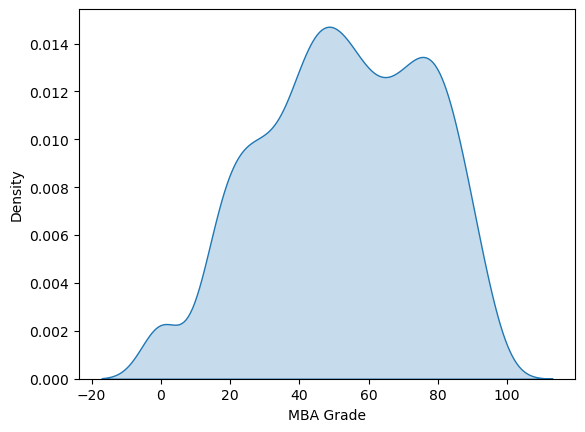

In [75]:
sbn.kdeplot(df['MBA Grade'],fill=True)

In [4]:
a=df.groupby("Undergrad Degree").agg({"Undergrad Grade":"mean","MBA Grade":"mean","Employability (Before)":"mean","Employability (After)":"mean","Annual Salary":"mean"})
print(a)

                  Undergrad Grade  MBA Grade  Employability (Before)  \
Undergrad Degree                                                       
Art                     55.986216  51.654348              214.681223   
Business                57.777500  54.170817              218.175097   
Computer Science        56.278298  53.042500              217.171548   
Engineering             56.605150  53.166946              215.987288   
Finance                 56.038053  51.957692              215.275862   

                  Employability (After)  Annual Salary  
Undergrad Degree                                        
Art                          291.730521  101916.666667  
Business                     287.778365  125572.013889  
Computer Science             289.030044  125158.629149  
Engineering                  289.133789  125055.555556  
Finance                      282.772312  125733.217391  


C:\Users\Srushti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Srushti\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


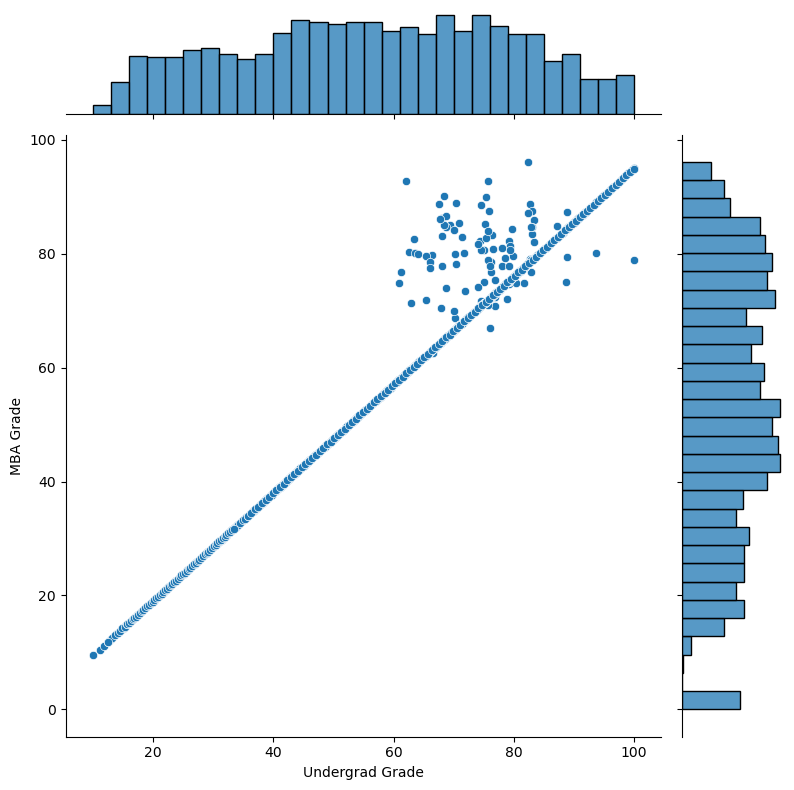

In [12]:
import seaborn as sns

# Create a joint plot
sbn.jointplot(x='Undergrad Grade', y='MBA Grade', data=df, kind='scatter', height=8, ratio=5, marginal_kws=dict(bins=30, fill=True))

plt.show()


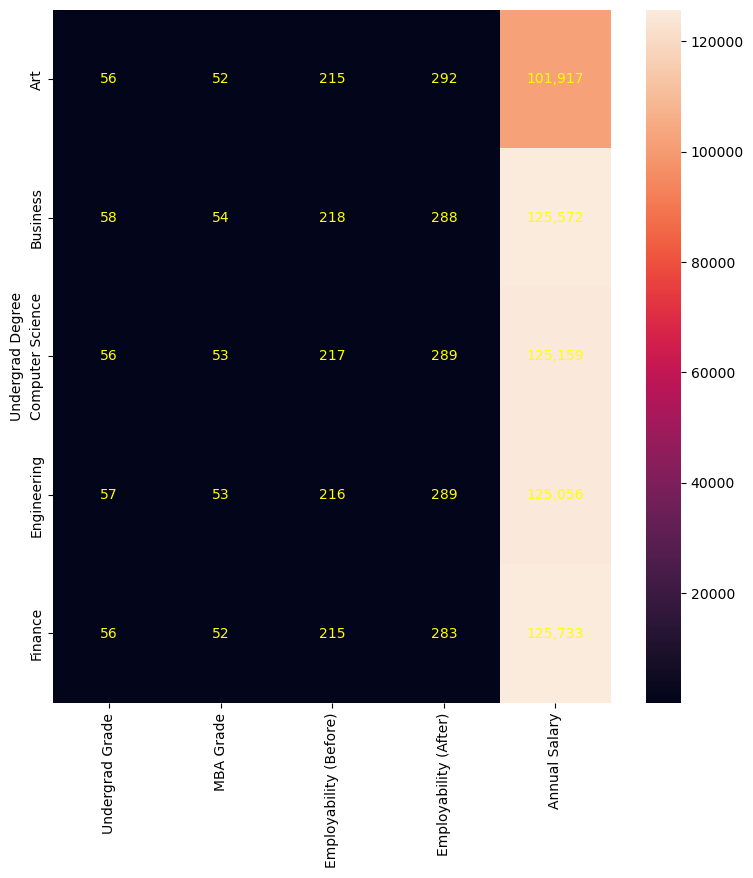

In [5]:
plt.figure(figsize=(9,9))
ax=sbn.heatmap(data=a,annot_kws={"size": 12}, fmt=',.0f')
for i in range(a.shape[0]):
    for j in range(a.shape[1]):
        ax.text(j + 0.5, i + 0.5, f"{a.iloc[i, j]:,.0f}",
                ha='center', va='center', color='yellow', fontsize=10)

plt.show()